In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

sys.path.append('seismo/src')
from stat_seismo import *

%matplotlib inline

# Analyze the outputs of the NND declustering

In [4]:
raw_fname = "/Users/jgra0019/Documents/codes/seismo/nnd_declustering/southern_california_2014-2019.h5"
nnd_fname = "/Users/jgra0019/Documents/codes/seismo/nnd_declustering/southern_california_2014-2019_nnd.h5"

raw_df = pd.read_hdf(raw_fname, 'table')
nnd_df = pd.read_hdf(nnd_fname, 'table')

In [3]:
raw_csv = "/Users/jgra0019/Documents/codes/seismo/nnd_declustering/southern_california_2014-2019.csv"
raw_df.to_csv(raw_csv, header = True, index = False)

In [ ]:
# look at the hist for the entire catalog
m_vals, cum_mag, non_cum_mag = get_freq_mag_dist(final_df["MAG"], mag_bin = 0.1)

fig, ax = plt.subplots(dpi = 100)
ax.plot(m_vals, non_cum_mag, 'o', markersize = 2, label = "Non-cumulative")
ax.plot(m_vals, cum_mag, 'o', markersize = 2, label = "Cumulative")
ax.set_xlabel("Magnitude")
ax.set_ylabel("Frequency")
ax.set_yscale("log")
ax.legend()

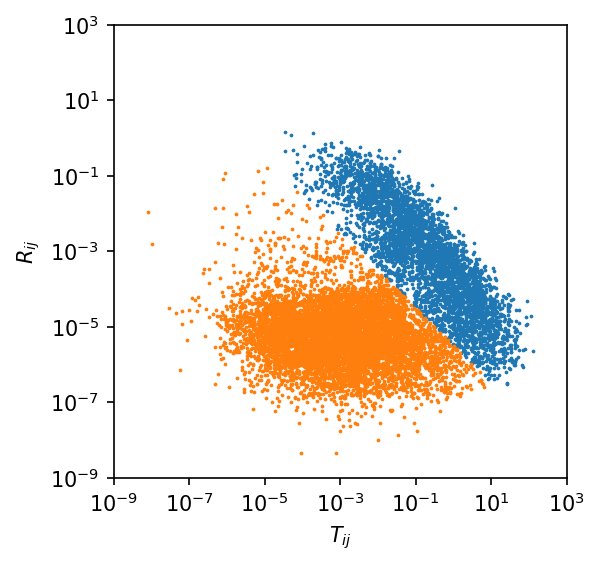

In [64]:
thresh = 10**-5.5
g1 = nnd_df[nnd_df["Nij"] > thresh]
g2 = nnd_df[nnd_df["Nij"] < thresh]
fig, ax = plt.subplots(dpi = 150)

ax.plot(g1["Tij"], g1["Rij"], 'o', markersize = 0.8, color = "C0")
ax.plot(g2["Tij"], g2["Rij"], 'o', markersize = 0.8, color = "C1")

# labels
ax.set_xlabel(r"$T_{ij}$")
ax.set_ylabel(r"$R_{ij}$")

# other settings
ax.set_xlim([1e-9, 1e3])
ax.set_ylim([1e-9, 1e3])
ax.loglog()
ax.set_aspect(1)

(array([  1.,   1.,   6.,  15.,  39.,  65., 164., 275., 431., 541., 690.,
        756., 675., 725., 710., 711., 555., 505., 439., 287., 256., 325.,
        439., 636., 736., 791., 600., 280.,  71.,   7.]),
 array([-13.41513136, -13.02755487, -12.63997838, -12.25240189,
        -11.8648254 , -11.47724891, -11.08967241, -10.70209592,
        -10.31451943,  -9.92694294,  -9.53936645,  -9.15178996,
         -8.76421347,  -8.37663698,  -7.98906049,  -7.601484  ,
         -7.21390751,  -6.82633102,  -6.43875453,  -6.05117804,
         -5.66360155,  -5.27602506,  -4.88844857,  -4.50087208,
         -4.11329559,  -3.7257191 ,  -3.33814261,  -2.95056612,
         -2.56298963,  -2.17541314,  -1.78783665]),
 <a list of 30 Patch objects>)

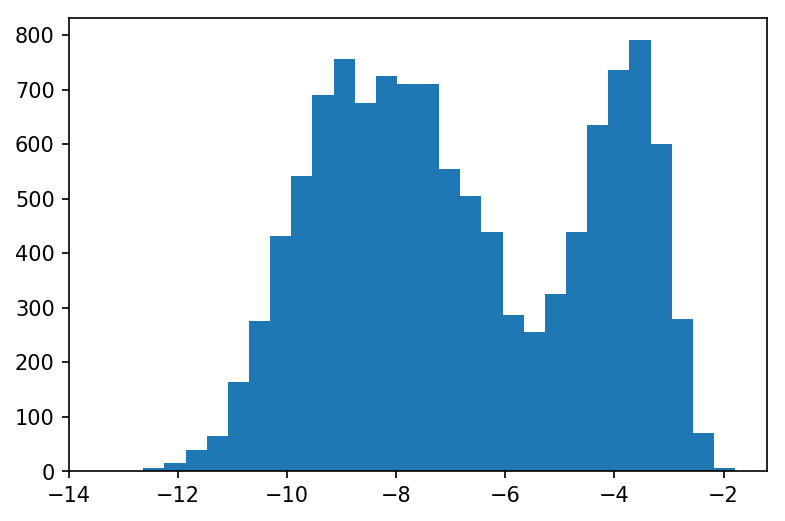

In [60]:
x_use = np.array(nnd_df[nnd_df["Nij"] > 0]["Nij"])
x_log = np.log10(x_use)
fig, ax = plt.subplots(dpi = 150)
ax.hist(x_log, bins = "fd")
#ax.set_xscale("log")

# labels
# ax.set_xlabel(r"$T_{ij}$")
# ax.set_ylabel(r"$R_{ij}$")

# # other settings
# ax.set_xlim([1e-9, 1e3])
# ax.set_ylim([1e-9, 1e3])
# ax.loglog()
# ax.set_aspect(1)